
Evaluating models for the 2000s...
Linear Regression: R-squared: 0.648, MAE: 46.195, RMSE: 69.176
Random Forest: R-squared: 0.537, MAE: 51.468, RMSE: 79.319

Feature Importance for Random Forest in the 2000s:
                  Feature  Importance
2              num__Votes    0.587653
0  num__Runtime (Minutes)    0.135480
1             num__Rating    0.104480
9          cat__Drama_1.0    0.030536
3         cat__Action_1.0    0.028772
Gradient Boosting: R-squared: 0.547, MAE: 55.671, RMSE: 78.502

Feature Importance for Gradient Boosting in the 2000s:
                  Feature  Importance
2              num__Votes    0.524940
0  num__Runtime (Minutes)    0.201371
1             num__Rating    0.125296
3         cat__Action_1.0    0.065700
7         cat__Comedy_1.0    0.024432

Evaluating models for the 2010s...
Linear Regression: R-squared: 0.367, MAE: 54.099, RMSE: 91.529


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest: R-squared: 0.506, MAE: 46.792, RMSE: 80.871

Feature Importance for Random Forest in the 2010s:
                  Feature  Importance
2              num__Votes    0.573083
4      cat__Adventure_1.0    0.102261
1             num__Rating    0.075049
0  num__Runtime (Minutes)    0.069139
5     cat__Aniimation_1.0    0.057358
Gradient Boosting: R-squared: 0.482, MAE: 46.987, RMSE: 82.813

Feature Importance for Gradient Boosting in the 2010s:
                  Feature  Importance
2              num__Votes    0.571656
5     cat__Aniimation_1.0    0.089717
4      cat__Adventure_1.0    0.087443
1             num__Rating    0.069248
0  num__Runtime (Minutes)    0.056164


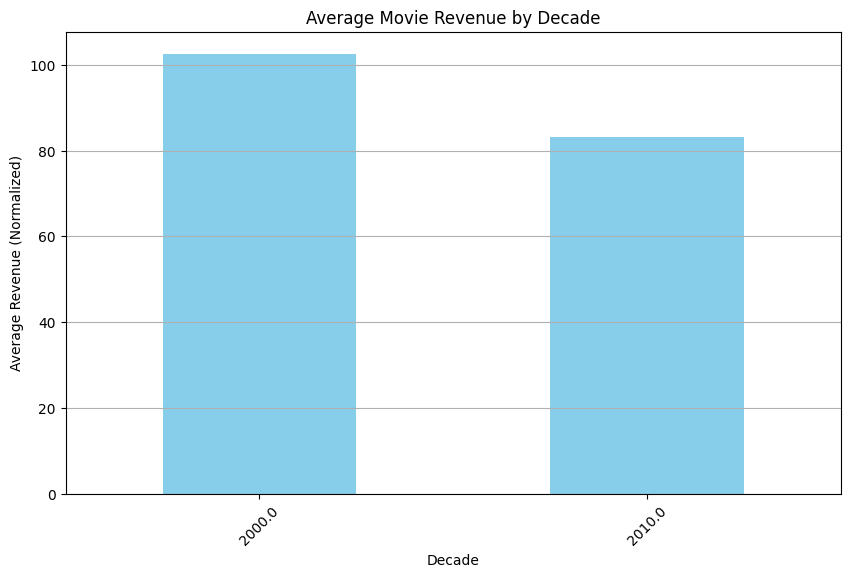


--- Comparison of Feature Importance Across Decades ---

Top features for the 2000s:

Model: Random Forest
                  Feature  Importance
2              num__Votes    0.587653
0  num__Runtime (Minutes)    0.135480
1             num__Rating    0.104480
9          cat__Drama_1.0    0.030536
3         cat__Action_1.0    0.028772

Model: Gradient Boosting
                  Feature  Importance
2              num__Votes    0.524940
0  num__Runtime (Minutes)    0.201371
1             num__Rating    0.125296
3         cat__Action_1.0    0.065700
7         cat__Comedy_1.0    0.024432

Top features for the 2010s:

Model: Random Forest
                  Feature  Importance
2              num__Votes    0.573083
4      cat__Adventure_1.0    0.102261
1             num__Rating    0.075049
0  num__Runtime (Minutes)    0.069139
5     cat__Aniimation_1.0    0.057358

Model: Gradient Boosting
                  Feature  Importance
2              num__Votes    0.571656
5     cat__Aniimation_1.0    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the movie dataset
file_path = 'movie_dataset.csv'
movies_df = pd.read_csv(file_path)

# Feature Engineering: Create 'Decade' column
movies_df['Decade'] = (movies_df['Year'] // 10) * 10

# Define the features and target variable
genre_columns = ['Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime',
                 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
                 'War', 'Western']
features = ['Runtime (Minutes)', 'Rating', 'Votes'] + genre_columns
target = 'Revenue (Millions)'

# Initialize models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Preprocessing: Scaling and Encoding
numeric_features = ['Runtime (Minutes)', 'Rating', 'Votes']
categorical_features = genre_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)])

# Train and evaluate models for each decade
results = {}
feature_importances = {}

for decade in sorted(movies_df['Decade'].unique()):
    print(f"\nEvaluating models for the {int(decade)}s...")

    # Subset data for the current decade
    decade_df = movies_df[movies_df['Decade'] == decade]

    # Prepare the data
    X = decade_df[features]
    y = decade_df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"{model_name}: R-squared: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

        # Store the results
        if decade not in results:
            results[decade] = {}
        results[decade][model_name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}

        # Feature importance (for tree-based models)
        if model_name in ['Random Forest', 'Gradient Boosting']:
            # Get feature names after the preprocessing step
            feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=features)
            feature_importance = model.feature_importances_
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
            importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
            print(f"\nFeature Importance for {model_name} in the {int(decade)}s:")
            print(importance_df_sorted.head())

            # Store feature importances for comparison
            if decade not in feature_importances:
                feature_importances[decade] = {}
            feature_importances[decade][model_name] = importance_df_sorted

# Plot average revenue trends across decades
avg_revenue_per_decade = movies_df.groupby('Decade')['Revenue (Millions)'].mean()

plt.figure(figsize=(10, 6))
avg_revenue_per_decade.plot(kind='bar', color='skyblue')
plt.title('Average Movie Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Revenue (Normalized)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Compare feature importance scores across decades
print("\n--- Comparison of Feature Importance Across Decades ---")
for decade in sorted(feature_importances.keys()):
    print(f"\nTop features for the {int(decade)}s:")
    for model_name, importance_df in feature_importances[decade].items():
        print(f"\nModel: {model_name}")
        print(importance_df.head())

# Compare model performances across decades
print("\n--- Comparison of Model Performances Across Decades ---")
for decade in sorted(results.keys()):
    print(f"\nModel performance for the {int(decade)}s:")
    for model_name, metrics in results[decade].items():
        print(f"{model_name} - R-squared: {metrics['R-squared']:.3f}, MAE: {metrics['MAE']:.3f}, RMSE: {metrics['RMSE']:.3f}")